<a href="https://colab.research.google.com/github/hache22/PrediccionImagenes/blob/main/FINAL_TRANSFERENCIA_APRENDIZAJE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Este Script de Python realiza la transferencia de aprendizaje de un modelo ya entrenado para el procesamiento de imagenes, incluye el entrenamiento de las nuevas capas de entrenamiento para la prediccion de imagenes -> si corresponde a un ventilador o a un colectivo(autobus)* 🙌.
Previamente se realizo la busqueda de las imagenes dentro de google sobre ventiladores y autobuses para entrenar al modelo (primera linea)

In [ ]:
!ls /content/dataset/colectivos | wc -l
!ls /content/dataset/ventiladores | wc -l

https://th.bing.com/th/id/OIP.u_k7dnKroJnwvlqI8SMjhQHaFj?w=960&h=720&rs=1&pid=ImgDetMain325
407


In [ ]:
# IMPORTACION DE LIBRERIAS
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range=0.15,
    height_shift_range = 0.15,
    shear_range = 5,
    zoom_range = [0.7, 1.3],
    validation_split = 0.2
)

data_gen_entrenamiento = datagen.flow_from_directory("/content/dataset",
                                                     target_size=(224,224),
                                                     batch_size=32, shuffle=True,
                                                     subset="training")

data_gen_pruebas = datagen.flow_from_directory("/content/dataset",
                                                     target_size=(224,224),
                                                     batch_size=32, shuffle=True,
                                                     subset="validation")

Found 586 images belonging to 3 classes.
Found 146 images belonging to 3 classes.


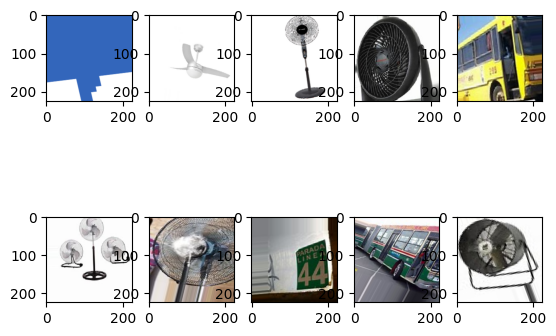

In [ ]:
import matplotlib.pyplot as plt

for imagenes, etiquetas in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(imagenes[i])

  break
plt.show()

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

url ="https://www.tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224, 224, 3))

In [ ]:
# congelamiento de las capas para evitar overfitting
mobilenetv2.trainable = False

In [ ]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(3, activation="softmax")
])

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2261827 (8.63 MB)
Trainable params: 3843 (15.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
modelo.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
EPOCAS = 10
historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 9/19 [=============>................] - ETA: 4s - loss: 0.6891 - accuracy: 0.6562

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/19 [==============================] - ETA: 0s - loss: 0.4397 - accuracy: 0.7969

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/19 [==============================] - 22s 760ms/step - loss: 0.4397 - accuracy: 0.7969 - val_loss: 0.0865 - val_accuracy: 0.9863
Epoch 2/10
 2/19 [==>...........................] - ETA: 9s - loss: 0.0814 - accuracy: 0.9762

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


18/19 [===========================>..] - ETA: 0s - loss: 0.1021 - accuracy: 0.9621

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/19 [==============================] - 13s 686ms/step - loss: 0.0992 - accuracy: 0.9625 - val_loss: 0.0376 - val_accuracy: 0.9932
Epoch 3/10
11/19 [================>.............] - ETA: 3s - loss: 0.0790 - accuracy: 0.9515

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


17/19 [=========================>....] - ETA: 1s - loss: 0.0695 - accuracy: 0.9655

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/19 [==============================] - ETA: 0s - loss: 0.0699 - accuracy: 0.9642

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/19 [==============================] - 14s 745ms/step - loss: 0.0699 - accuracy: 0.9642 - val_loss: 0.0297 - val_accuracy: 0.9932
Epoch 4/10
14/19 [=====================>........] - ETA: 2s - loss: 0.0664 - accuracy: 0.9718

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/19 [========================>.....] - ETA: 1s - loss: 0.0630 - accuracy: 0.9735

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/19 [==============================] - 13s 691ms/step - loss: 0.0578 - accuracy: 0.9778 - val_loss: 0.0179 - val_accuracy: 1.0000


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 5/10
 9/19 [=============>................] - ETA: 5s - loss: 0.0461 - accuracy: 0.9812

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/19 [========================>.....] - ETA: 1s - loss: 0.0441 - accuracy: 0.9837

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/19 [==============================] - ETA: 0s - loss: 0.0468 - accuracy: 0.9829

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/19 [==============================] - 13s 685ms/step - loss: 0.0468 - accuracy: 0.9829 - val_loss: 0.0338 - val_accuracy: 0.9863
Epoch 6/10
10/19 [==============>...............] - ETA: 5s - loss: 0.0333 - accuracy: 0.9906

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/19 [========================>.....] - ETA: 1s - loss: 0.0348 - accuracy: 0.9857

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/19 [==============================] - ETA: 0s - loss: 0.0363 - accuracy: 0.9863

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/19 [==============================] - 13s 697ms/step - loss: 0.0363 - accuracy: 0.9863 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 7/10
 3/19 [===>..........................] - ETA: 8s - loss: 0.0287 - accuracy: 0.9896

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


13/19 [===================>..........] - ETA: 3s - loss: 0.0379 - accuracy: 0.9898

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/19 [==============================] - ETA: 0s - loss: 0.0388 - accuracy: 0.9881

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/19 [==============================] - 13s 670ms/step - loss: 0.0388 - accuracy: 0.9881 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 8/10
 9/19 [=============>................] - ETA: 5s - loss: 0.0273 - accuracy: 0.9931

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/19 [==============================] - ETA: 0s - loss: 0.0255 - accuracy: 0.9932

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/19 [==============================] - 13s 678ms/step - loss: 0.0255 - accuracy: 0.9932 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 9/10
10/19 [==============>...............] - ETA: 3s - loss: 0.0281 - accuracy: 0.9906

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/19 [==============================] - ETA: 0s - loss: 0.0308 - accuracy: 0.9915

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/19 [==============================] - 12s 655ms/step - loss: 0.0308 - accuracy: 0.9915 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 10/10
 5/19 [======>.......................] - ETA: 5s - loss: 0.0343 - accuracy: 0.9855

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


10/19 [==============>...............] - ETA: 3s - loss: 0.0261 - accuracy: 0.9899

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/19 [==============================] - ETA: 0s - loss: 0.0268 - accuracy: 0.9932

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/19 [==============================] - 13s 697ms/step - loss: 0.0268 - accuracy: 0.9932 - val_loss: 0.0155 - val_accuracy: 1.0000


In [ ]:
from PIL import Image
import cv2

def categorizar(ruta):
  img = Image.open(ruta)
  img = img.convert("RGB")
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224, 224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

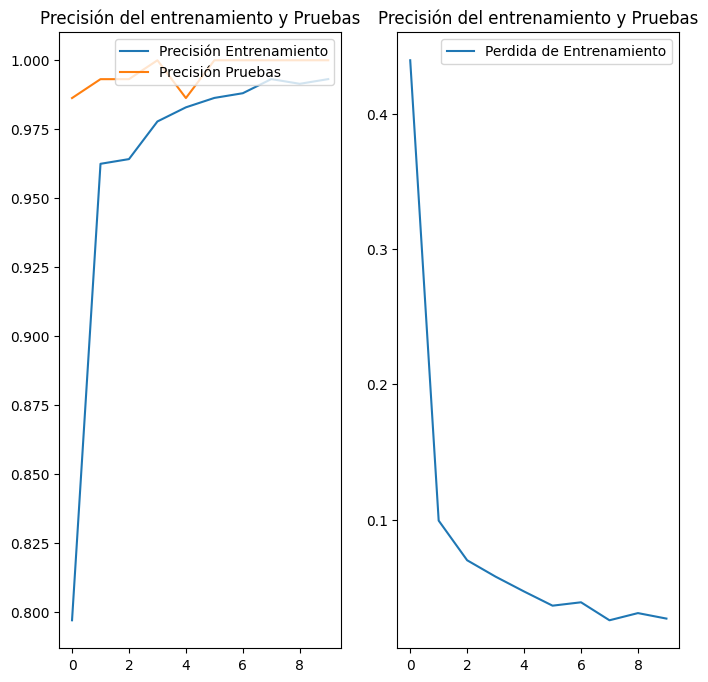

In [ ]:
# graficar precision
acc= historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss= historial.history['loss']
val_loss = ['val_loss']

rango_epocas=range(10)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas , acc , label = 'Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc , label='Precisión Pruebas')
plt.legend(loc='upper right')
plt.title('Precisión del entrenamiento y Pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas , loss , label='Perdida de Entrenamiento')
# plt.plot(rango_epocas, val_loss, label='Pérdida de Pruebas')
plt.legend(loc='upper right')
plt.title('Precisión del entrenamiento y Pruebas')

plt.show()

In [ ]:
import requests
from io import BytesIO
import cv2

def categorizacion(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img , (224,224))
  prediccion= modelo.predict(img.reshape(-1 , 224 , 224 , 3))
  return np.argmax(prediccion[0], axis=-1)

In [ ]:
while True:
  try:
    url = input("Introduce aqui el link de la Imagen : ")
    prediccion= categorizacion(url)
    if prediccion == 1:
      print("La imagen Corresponde a un Colectivo")
    elif prediccion == 2:
      print("La Imagen Corresponde a un Ventilador")

  except :
     print("No se pudo encontrar la direccion de la Imagen")



No se pudo encontrar la direccion de la Imagen
Introduce aqui el link de la Imagen : https://th.bing.com/th/id/OIP.q4uy1CnD7dD9jt-rVx9aHgHaCv?w=332&h=129&c=7&r=0&o=5&pid=1.7
1/1 [==============================] - 0s 33ms/step
La imagen Corresponde a un Colectivo
Introduce aqui el link de la Imagen : https://th.bing.com/th/id/OIP.TpRiILM9_eQL2Ii9LGZ-yAHaGY?w=251&h=216&c=7&r=0&o=5&pid=1.7
1/1 [==============================] - 0s 108ms/step
La Imagen Corresponde a un Ventilador
